In [129]:
import numpy as np
import pylab as plt
from matplotlib.patches import Circle, Wedge
from matplotlib.animation import FuncAnimation
import networkx as nx

- http://personal.cimat.mx:8181/~jortega/MaterialDidactico/modestoI10/Proyectos/Blum%20(2005)AntCol.pdf
- https://strikingloo.github.io/ant-colony-optimization-tsp

## Toy Model
Following Blum, we can build a toy model of a ACO with two nodes and two edges of different length (weights). We then simulate a number of ants selecting one path from a probability distribution proportional to a parameter tau_i. We update tau after all the ants have performed a tour and the change in tau is inversely proportional to the length of the path - i.e. we favor the shortest path. We repeat this process a numner N_iterations and the ants will collectively select the shortest path.

(-2.0, 5.0)

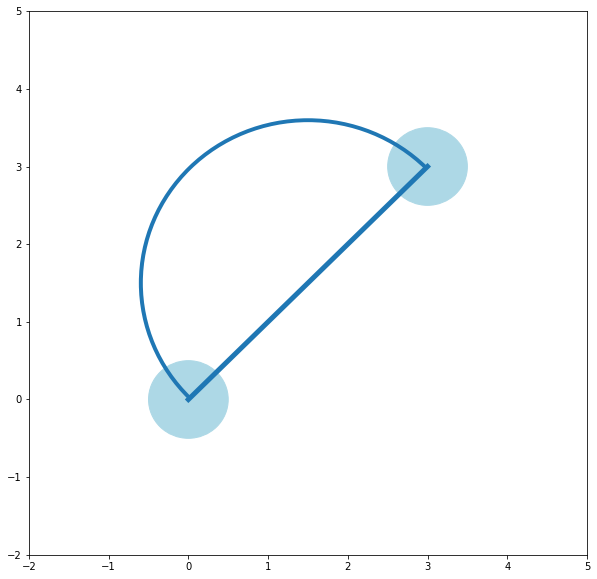

In [26]:
# Diagram of the system. Blue circles are the source and destination. 
# The two edges represent the paths available. 
fig, ax = plt.subplots(figsize=(10,10))
c1 = Circle((0,0),0.5,color='lightblue')
ax.add_patch(c1)
c2 = Circle((3,3),0.5,color='lightblue')
ax.add_patch(c2)

w = Wedge((1.5,1.5),1.5*np.sqrt(2),45,225,0.05)
ax.add_patch(w)

plt.plot([0,3],[0,3],linewidth=5)

ax.set_xlim([-2,5])
ax.set_ylim([-2,5])


In [97]:
# simulating ants in path 1
l_path1_sim_x = np.linspace(0,3,10) 
l_path1_sim_y = np.linspace(0,3,10) + np.random.normal(size=10)*0.1

In [100]:
# simulating ants in path 2
l_path2_sim_theta = np.linspace(np.pi*45/180,np.pi*225/180,10)
l_path2_sim_x = (1.5*np.sqrt(2))*np.cos(l_path2_sim_theta) + 1.5 + np.random.normal(size=10)*0.1
l_path2_sim_y = (1.5*np.sqrt(2))*np.sin(l_path2_sim_theta) + 1.5 + np.random.normal(size=10)*0.1

(-2.0, 5.0)

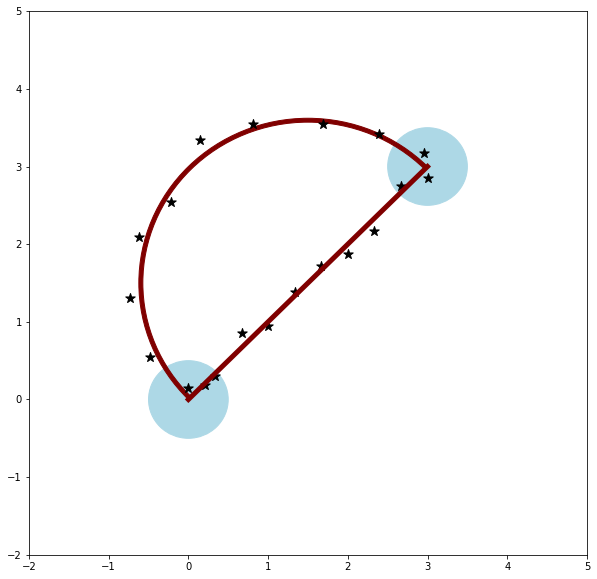

In [101]:
# The stars represent ants. The color of the edge depends on the value of tau
tau1 = tau2 = 0.5
l_tau = [tau1,tau2]

fig, ax = plt.subplots(figsize=(10,10))
c1 = Circle((0,0),0.5,color='lightblue')
ax.add_patch(c1)
c2 = Circle((3,3),0.5,color='lightblue')
ax.add_patch(c2)

w = Wedge((1.5,1.5),1.5*np.sqrt(2),45,225,0.05,color=[l_tau[1]/np.sum(l_tau),0,0])
ax.add_patch(w)

plt.plot([0,3],[0,3],linewidth=5,c=[l_tau[0]/np.sum(l_tau),0,0])

plt.scatter(l_path1_sim_x,l_path1_sim_y,c='k',s=100,marker='*')
plt.scatter(l_path2_sim_x,l_path2_sim_y,c='k',s=100,marker='*')

ax.set_xlim([-2,5])
ax.set_ylim([-2,5])

In [111]:
# performing an iteration
def perform_iteration(N_ants,N_iter):
    # initializing a vector tau 
    tau1 = tau2 = 0.5
    l_tau = [tau1,tau2]
    
    # length of paths
    l1 = 1
    l2 = 2
    l_length = [l1,l2]

    # model parameters
    Q = 1
    rho = 0.

    l_path_iterations = []
    l_path_tau = []
    for iteration in range(N_iter):
        l_paths = []
        l_paths_tau = []
        for i_ant in range(N_ants):
            # computing the probability for each path
            prob = [l_tau[0]/sum(l_tau),l_tau[1]/sum(l_tau)]
            # selecting one path following the above probability
            path_selected = np.random.choice([0,1],replace=False,p=prob)
            l_paths.append(path_selected)
            # updating the value of tau
            l_tau[path_selected] = l_tau[path_selected] + Q / l_length[path_selected]
            # pheromone degradation 
            l_tau[0] = l_tau[0]*(1-rho)
            l_tau[1] = l_tau[1]*(1-rho)
            
            l_paths_tau.append(l_tau.copy())
        l_path_iterations.append(l_paths)
        l_path_tau.append(l_paths_tau)
    # reporting average number of ants taking the shortest path and the value of tau on each iteration    
    return([np.mean(np.array(epoch)==0) for epoch in l_path_iterations],l_path_tau)

In [112]:
experiment10,l_tau_experiment10 = perform_iteration(N_ants=10,N_iter=200)

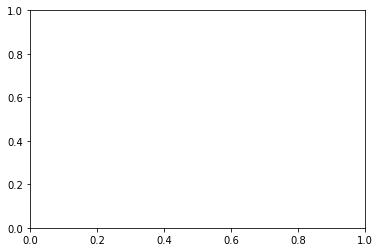

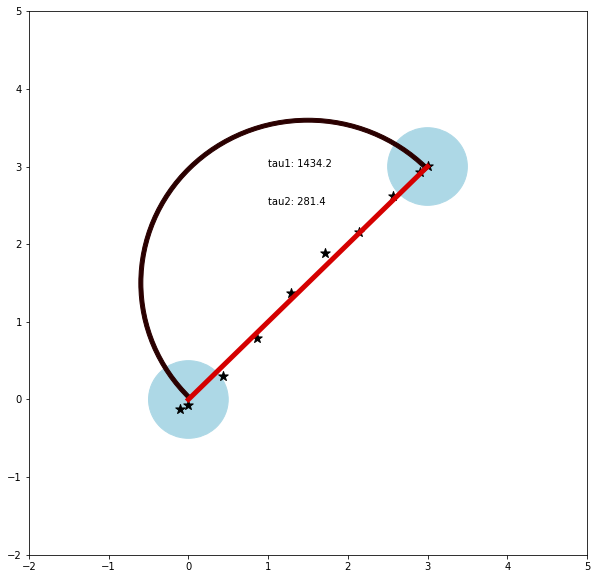

In [133]:
# plotting and animating the results

plt.cla()
fig, ax = plt.subplots(figsize=(10,10))

def animation(t):
    plt.cla()
    l_tau = np.mean(l_tau_experiment10[t],axis=0)
    N1 = int(10*np.mean(experiment10[t]))
    N2 = 10 - N1
    
    l_path1_sim_x = np.linspace(0,3,N1) 
    l_path1_sim_y = np.linspace(0,3,N1) + np.random.normal(size=N1)*0.1
    
    l_path2_sim_theta = np.linspace(np.pi*45/180,np.pi*225/180,N2)
    l_path2_sim_x = (1.5*np.sqrt(2))*np.cos(l_path2_sim_theta) + 1.5 + np.random.normal(size=N2)*0.1
    l_path2_sim_y = (1.5*np.sqrt(2))*np.sin(l_path2_sim_theta) + 1.5 + np.random.normal(size=N2)*0.1
    
    
        
    c1 = Circle((0,0),0.5,color='lightblue')
    ax.add_patch(c1)
    c2 = Circle((3,3),0.5,color='lightblue')
    ax.add_patch(c2)

    w = Wedge((1.5,1.5),1.5*np.sqrt(2),45,225,0.05,color=[l_tau[1]/np.sum(l_tau),0,0])
    ax.add_patch(w)

    plt.plot([0,3],[0,3],linewidth=5,c=[l_tau[0]/np.sum(l_tau),0,0])

    plt.scatter(l_path1_sim_x,l_path1_sim_y,c='k',s=100,marker='*')
    plt.scatter(l_path2_sim_x,l_path2_sim_y,c='k',s=100,marker='*')

    ax.set_xlim([-2,5])
    ax.set_ylim([-2,5])
    
    plt.text(1,3,'tau1: ' + str(np.round(l_tau[0],2)))
    plt.text(1,2.5,'tau2: ' + str(np.round(l_tau[1],2)))
    
    #plt.axis('off')
    
    #plt.savefig('AOC_toymodel_' + str(iteration).zfill(3)+'.png')

anim = FuncAnimation(fig, animation, frames=list(range(len(l_tau_experiment10))), interval=500, blit=False, repeat=True)
anim.save("ACO_toymodel_2.gif", dpi=120, writer="imagemagick")
 